In [1]:
import numpy as np 
import pandas as pd
from tensorflow.keras.applications import EfficientNetB0

In [2]:
og_df = pd.read_csv('labels.csv')

In [3]:
og_df['label'].value_counts()

label
2    1426
3     930
1     708
Name: count, dtype: int64

In [4]:
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from sklearn.model_selection import train_test_split

In [5]:
df = og_df.copy()

In [6]:
df['label'] = df['label'] - df['label'].min()

In [7]:
# Image directory and resize config
img_dir = 'C:/Users/User/dimaag/png_images'
IMG_SIZE = (224, 224)

In [8]:
# Preload all images and labels into NumPy arrays
images = []
labels = []

for _, row in df.iterrows():
    img_path = os.path.join(img_dir, row['filename'])
    image = load_img(img_path, target_size=IMG_SIZE)
    image = img_to_array(image) / 255.0
    label = row['label']
    images.append(image)
    labels.append(label)

In [9]:
# Preload all images and labels into NumPy arrays
images = []
labels = []

for _, row in df.iterrows():
    img_path = os.path.join(img_dir, row['filename'])
    image = load_img(img_path, target_size=IMG_SIZE)
    image = img_to_array(image) / 255.0
    label = row['label']
    images.append(image)
    labels.append(label)

In [10]:
# Convert to NumPy arrays first
images = np.array(images, dtype=np.float32)
labels = np.array(labels, dtype=np.int32)

In [11]:
#Now split the NumPy arrays
X_train, X_val, y_train, y_val = train_test_split(
    images, labels, test_size=0.2, stratify=labels, random_state=42
)

In [12]:
#Convert to TensorFlow tensors
X_train = tf.convert_to_tensor(X_train, dtype=tf.float32)
X_val   = tf.convert_to_tensor(X_val, dtype=tf.float32)
y_train = tf.convert_to_tensor(y_train, dtype=tf.int32)
y_val   = tf.convert_to_tensor(y_val, dtype=tf.int32)

In [13]:
df['label'].value_counts()

label
1    1426
2     930
0     708
Name: count, dtype: int64

In [14]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras import layers, models
from tensorflow.keras import Sequential, Input
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [15]:
efficientnet_base = EfficientNetB0(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
efficientnet_base.trainable = False

efficientnet_model = Sequential([
    efficientnet_base,
    layers.GlobalAveragePooling2D(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(3, activation='softmax')
])

efficientnet_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

efficientnet_model.fit(X_train, y_train, epochs=10, validation_data=(X_val, y_val), batch_size=32)

Epoch 1/10
77/77 ━━━━━━━━━━━━━━━━━━━━ 163s 2s/step - accuracy: 0.4215 - loss: 1.1019 - val_accuracy: 0.4649 - val_loss: 1.0712
Epoch 2/10
77/77 ━━━━━━━━━━━━━━━━━━━━ 159s 2s/step - accuracy: 0.4698 - loss: 1.0652 - val_accuracy: 0.4649 - val_loss: 1.0575
Epoch 3/10
77/77 ━━━━━━━━━━━━━━━━━━━━ 156s 2s/step - accuracy: 0.4508 - loss: 1.0706 - val_accuracy: 0.4649 - val_loss: 1.0568
Epoch 4/10
77/77 ━━━━━━━━━━━━━━━━━━━━ 151s 2s/step - accuracy: 0.4581 - loss: 1.0646 - val_accuracy: 0.4649 - val_loss: 1.0573
Epoch 5/10
77/77 ━━━━━━━━━━━━━━━━━━━━ 152s 2s/step - accuracy: 0.4851 - loss: 1.0528 - val_accuracy: 0.4649 - val_loss: 1.0647
Epoch 6/10
77/77 ━━━━━━━━━━━━━━━━━━━━ 157s 2s/step - accuracy: 0.4751 - loss: 1.0606 - val_accuracy: 0.4649 - val_loss: 1.0597
Epoch 7/10
77/77 ━━━━━━━━━━━━━━━━━━━━ 133s 2s/step - accuracy: 0.4589 - loss: 1.0628 - val_accuracy: 0.4649 - val_loss: 1.0575
Epoch 8/10
77/77 ━━━━━━━━━━━━━━━━━━━━ 99s 1s/step - accuracy: 0.4588 - loss: 1.0596 - val_accuracy: 0.4649 - va

20/20 ━━━━━━━━━━━━━━━━━━━━ 51s 2s/step

Classification Report (EfficientNetB0):
              precision    recall  f1-score   support

  Meningioma       0.00      0.00      0.00       142
      Glioma       0.46      1.00      0.63       285
   Pituitary       0.00      0.00      0.00       186

    accuracy                           0.46       613
   macro avg       0.15      0.33      0.21       613
weighted avg       0.22      0.46      0.30       613



C:\Users\User\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\User\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\User\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


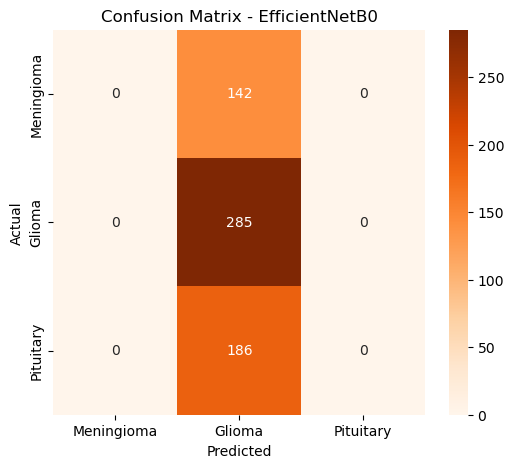

EfficientNetB0 Accuracy: 0.4649


In [16]:
y_pred_probs = efficientnet_model.predict(X_val)
y_pred = np.argmax(y_pred_probs, axis=1)
y_true = y_val.numpy() if isinstance(y_val, tf.Tensor) else y_val

print("\nClassification Report (EfficientNetB0):")
class_names = ["Meningioma", "Glioma", "Pituitary"]
print(classification_report(y_true, y_pred, target_names=class_names))

cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Oranges",
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - EfficientNetB0")
plt.show()

print(f"EfficientNetB0 Accuracy: {accuracy_score(y_true, y_pred):.4f}")
